**Import the Libraries**

In [ ]:

import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

**Load the data**

In [ ]:
df = pd.read_csv("/IMDbMoviesIndia.csv",encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Display summary statistics of the dataset
print(df.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [ ]:
# Display information about the dataset (including missing values)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [ ]:
# Dataset Rows & Columns count
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  15509
Number of columns are:  10


In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

# Missing Values/Null Values Count
df.isnull().sum()

number of duplicated rows are 6


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
#Handling missing values
#drop rows with any missing values
df = df.dropna()

In [ ]:
#Handling duplicate rows

# Drop duplicate rows
df = df.drop_duplicates()

In [ ]:
# Verify that there are no more missing values or duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64
0


**Exploratory Data Analysis(EDA)**

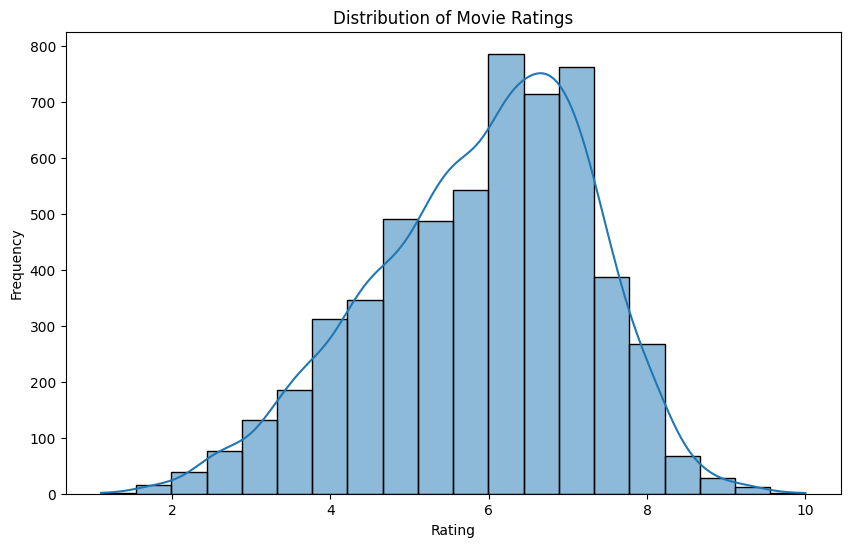

In [ ]:
# Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



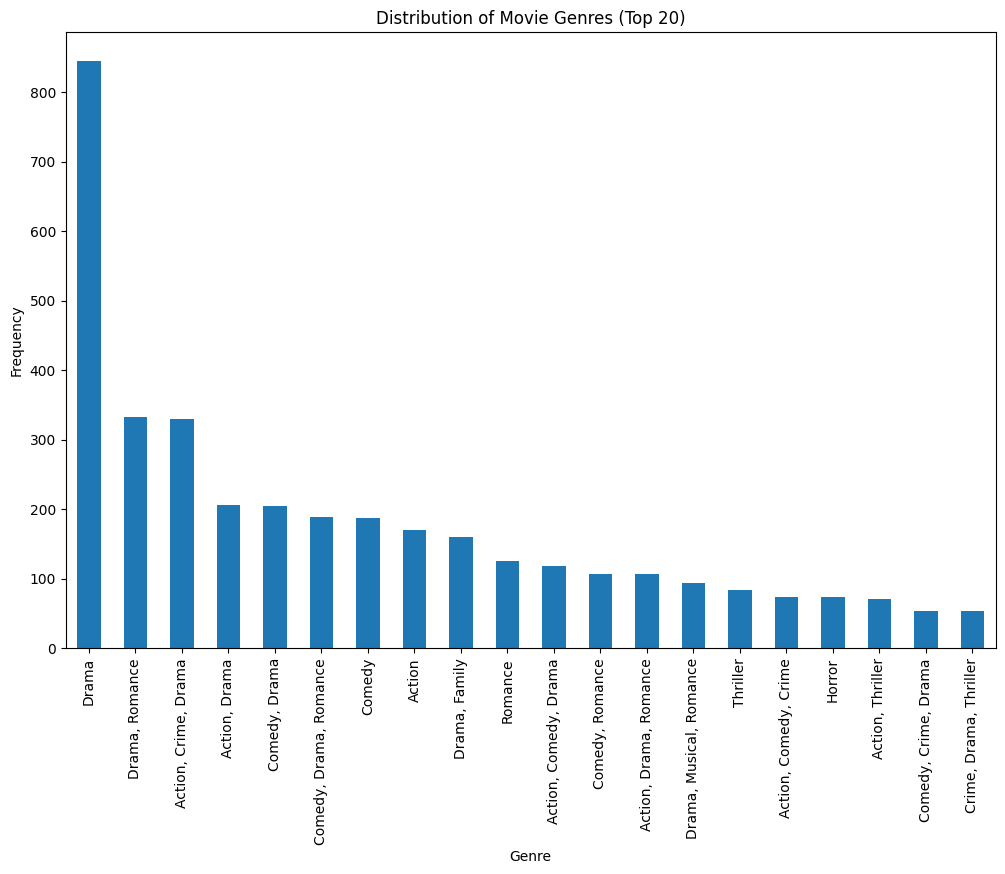

In [ ]:
# Aggregate data for the distribution of movie genres
plt.figure(figsize=(12, 8))
top_genres = df['Genre'].value_counts().nlargest(20)  # Show top 20 genres
top_genres.plot(kind='bar')
plt.title('Distribution of Movie Genres (Top 20)')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

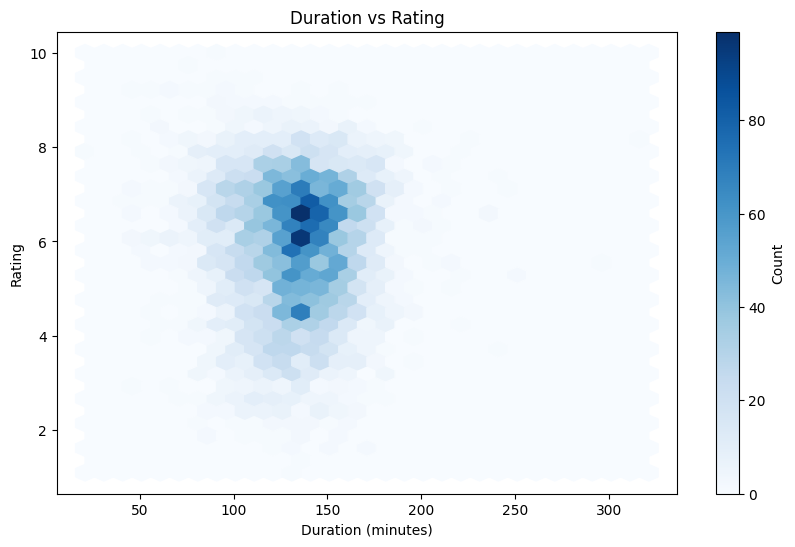

In [ ]:
# Relationship between duration and rating
# Use a hexbin plot for the relationship between duration and rating
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
plt.hexbin(df['Duration'], df['Rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

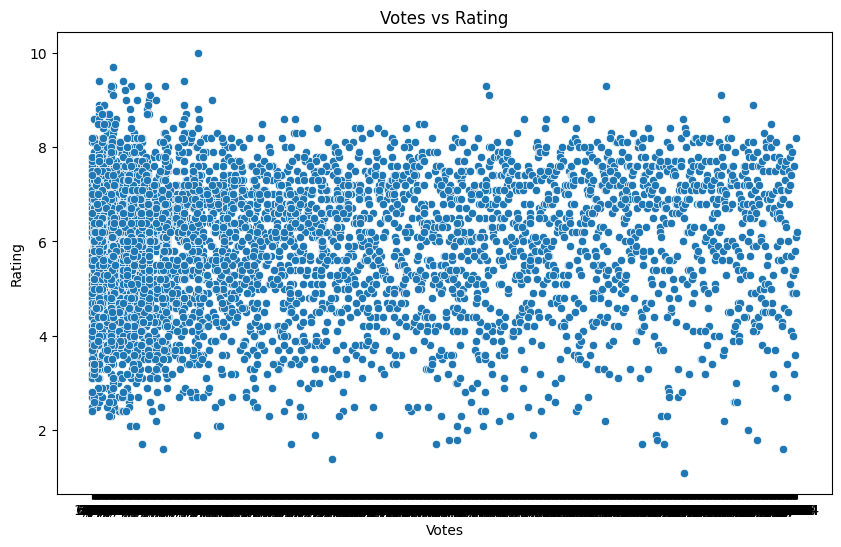

In [ ]:
# Relationship between votes and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

**Feature Engineering**

In [ ]:
# Ensure 'duration' column is treated as string before replacing and converting
df['Duration'] = df['Duration'].astype(str).str.replace(' min', '').astype(int)

# Preprocess 'votes' to remove commas and convert to integer
df['Votes'] = df['Votes'].astype(str).str.replace(',', '').astype(int)

# Preprocess 'year' to remove any non-numeric characters and convert to integer
df['Year'] = df['Year'].astype(str).str.extract('(\d{4})')[0].astype(int)


In [ ]:
# Combine actor columns into one feature
df['Actors'] = df['Actor 1'] + ',' + df['Actor 2'] + ',' + df['Actor 3']
df.drop(columns=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [ ]:
# Define features and target variable
X = df.drop(columns=['Rating'])
y = df['Rating']

In [ ]:
# Define categorical and numerical features
categorical_features = ['Genre', 'Director', 'Actors']
numerical_features = ['Year', 'Duration', 'Votes']

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor( random_state=42))
])

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Duration',
                                                   'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actors'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
from sklearn.metrics import r2_score
# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 1.254048059187279
R-squared (R2) Score: 0.32277447701395223


In [ ]:
# Feature importance visualization with top 20 features
feature_names = numerical_features + list(model.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features))
importances = model.named_steps['regressor'].feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
# Show top 20 features
N = 20
top_indices = indices[:N]

In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(len(top_indices)):
    print(f"{f + 1}. feature {feature_names[top_indices[f]]} ({importances[top_indices[f]]})")

Feature ranking:
1. feature Votes (0.21937761826811758)
2. feature Year (0.18547912786457665)
3. feature Duration (0.09329092757817027)
4. feature Genre_Drama (0.039154417017227286)
5. feature Genre_Documentary (0.011918633112797112)
6. feature Genre_Drama, Family (0.004108364530158942)
7. feature Genre_Crime, Drama (0.0038445219712328997)
8. feature Genre_Horror (0.0037762514391511746)
9. feature Genre_Action, Crime, Drama (0.0035204540334534094)
10. feature Director_Sajid Khan (0.0031893004058315393)
11. feature Genre_Action (0.0030826369694196857)
12. feature Genre_Comedy, Drama (0.00279368554655098)
13. feature Genre_Comedy, Drama, Romance (0.0027697429579693336)
14. feature Genre_Action, Drama (0.002744470845278906)
15. feature Genre_Drama, Romance (0.002562500807839295)
16. feature Genre_Thriller (0.002404792465842193)
17. feature Genre_Romance (0.0023438929941164044)
18. feature Genre_Comedy (0.002290275196018678)
19. feature Genre_Action, Crime, Thriller (0.0022576379601059325)

**Predictive System**

In [ ]:
def predict_rating(movie_data):
    """
    Predicts the rating of a movie given its features.

    Parameters:
    - movie_data (dict): Dictionary containing movie features ('genre', 'director', 'actors', 'year', 'duration', 'votes').

    Returns:
    - float: Predicted rating of the movie.
    """
    # Create DataFrame from input data
    df = pd.DataFrame([movie_data])

    # Predict using the trained model
    rating_pred = model.predict(df)[0]

    return rating_pred

# Example usage:
movie_data = {
    'Genre': 'Action',
    'Director': 'Christopher Nolan',
    'Actors': 'Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page',
    'Year': 2010,
    'Duration': 148,
    'Votes': 180000
}

predicted_rating = predict_rating(movie_data)
print(f'Predicted Rating: {predicted_rating}')

Predicted Rating: 8.113000000000007


**The Year with the Best Rating:**

In [99]:
mean_rating_per_year = df.groupby('Year')['Rating'].mean()

# Find the year with the highest mean rating
best_year = mean_rating_per_year.idxmax()
best_rating = mean_rating_per_year.max()

print(f"The year with the best average rating: {best_year} with a rating of {best_rating:.2f}")

The year with the best average rating: 1952 with a rating of 7.21


**Impact of Movie Length (Duration) on Rating:**

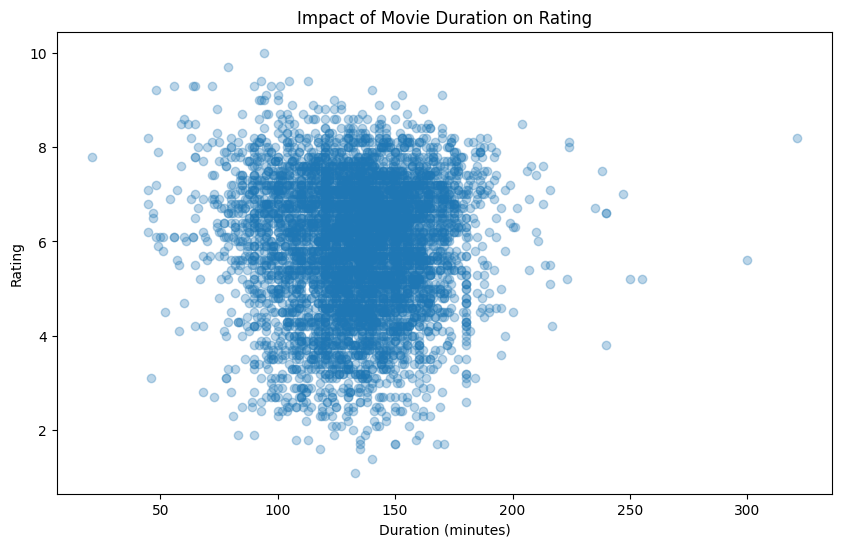

Correlation between Duration and Rating: 0.00


In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Rating'], alpha=0.3)
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('Impact of Movie Duration on Rating')
plt.show()

# Correlation coefficient between 'Duration' and 'Rating'
correlation = df['Duration'].corr(df['Rating'])
print(f"Correlation between Duration and Rating: {correlation:.2f}")

**Top 10 Movies According to Rating per Year and Overall:**

In [102]:
# Top 10 movies overall by rating
top_10_overall = df.nlargest(10, 'Rating')[['Name', 'Year', 'Rating']]

# Top 10 movies per year by rating
top_10_per_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating'))[['Name', 'Rating']].reset_index(drop=True)

# Display results
print("Top 10 Movies Overall by Rating:")
print(top_10_overall)

print("\nTop 10 Movies Per Year by Rating:")
print(top_10_per_year)

Top 10 Movies Overall by Rating:
                      Name  Year  Rating
8339       Love Qubool Hai  2020    10.0
5410            Half Songs  2021     9.7
5077          Gho Gho Rani  2019     9.4
6852                  June  2021     9.4
14222  The Reluctant Crime  2020     9.4
1314          Ashok Vatika  2018     9.3
1729              Baikunth  2021     9.3
5125           God of gods  2019     9.3
8344          Love Sorries  2021     9.3
11843              Refl3ct  2021     9.3

Top 10 Movies Per Year by Rating:
                       Name  Rating
0    The Light of the World     6.2
1                  Draupadi     5.3
2                Indrasabha     6.0
3                      Fate     6.2
4                   Mazdoor     8.5
..                      ...     ...
812      Secrets of Sinauli     9.3
813                  Kaadan     9.1
814       Consequence Karma     9.0
815            Moral Nights     9.0
816                  Viraat     8.9

[817 rows x 2 columns]


**Number of popular movies released each year:**

In [103]:
# Define threshold for popularity (e.g., movies with more than 1000 votes)
popularity_threshold = 1000

# Filter movies based on popularity threshold
popular_movies = df[df['Votes'] > popularity_threshold]

# Count popular movies per year
popular_movies_per_year = popular_movies.groupby('Year').size().reset_index(name='Num_Popular_Movies')

print("Number of popular movies released each year:")
print(popular_movies_per_year)

Number of popular movies released each year:
    Year  Num_Popular_Movies
0   1951                   1
1   1953                   1
2   1955                   2
3   1957                   4
4   1958                   2
..   ...                 ...
60  2017                  64
61  2018                  69
62  2019                  78
63  2020                  65
64  2021                  23

[65 rows x 2 columns]


**Director with Most Movies:**

In [107]:
# Director with most movies
director_most_movies = df['Director'].value_counts().idxmax()
num_movies_directed = df['Director'].value_counts().max()

print(f"Director with the most movies: {director_most_movies} ({num_movies_directed} movies)")





Director with the most movies: David Dhawan (41 movies)


**Top movies based on rating and number of votes:**

In [108]:
# Top movies based on rating and number of votes
top_movies_by_votes = df.nlargest(10, ['Rating', 'Votes'])[['Name', 'Year', 'Rating', 'Votes']]

# Group by year and find the movie with the highest rating and most votes
top_movies_per_year = df.loc[df.groupby('Year')['Rating'].idxmax()][['Name', 'Year', 'Rating', 'Votes']]

# Display results
print("Top Movies Overall by Rating and Votes:")
print(top_movies_by_votes)

print("\nTop Movies Per Year by Rating and Votes:")
print(top_movies_per_year)

Top Movies Overall by Rating and Votes:
                      Name  Year  Rating  Votes
8339       Love Qubool Hai  2020    10.0      5
5410            Half Songs  2021     9.7      7
5077          Gho Gho Rani  2019     9.4     47
6852                  June  2021     9.4     18
14222  The Reluctant Crime  2020     9.4     16
12673   Secrets of Sinauli  2021     9.3   1373
11843              Refl3ct  2021     9.3    467
8344          Love Sorries  2021     9.3     79
5125           God of gods  2019     9.3     46
13231           Sindhustan  2019     9.3     36

Top Movies Per Year by Rating and Votes:
                         Name  Year  Rating  Votes
14161  The Light of the World  1931     6.2    112
6073               Indrasabha  1932     6.0     12
4658                     Fate  1933     6.2     12
9053                  Mazdoor  1934     8.5      6
6087                 Inquilab  1935     7.4     38
...                       ...   ...     ...    ...
11841     Rediscovering India  20